In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


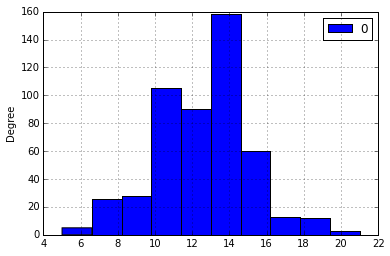

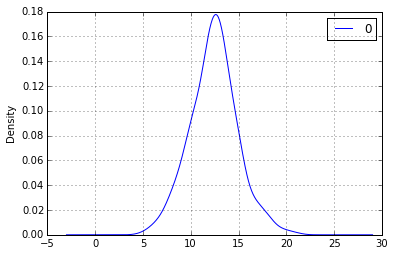

In [4]:
import pandas as pd
from scipy import stats

rv = stats.binom(25, 0.5)
s = rv.rvs(500)

df = pd.DataFrame(s)

df.plot(kind='hist')
df.plot(kind='kde')

## Hypothesis Testing
* tell apart the H0 distribution from the H1 distribution
* two types of errors: alpha and beta

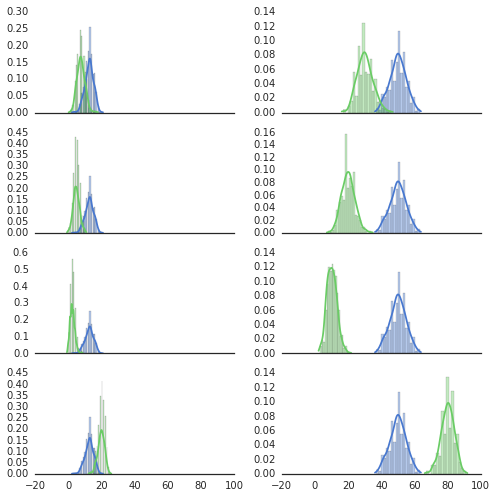

In [41]:
import numpy as np
from scipy import stats
import seaborn as sns


s1 = stats.binom(25, 0.5).rvs(500)
s2 = stats.binom(100, 0.5).rvs(500)

s = list(range(8))
for ix, p in enumerate([0.3, 0.3, 0.2, 0.2, 0.1, 0.1, 0.8, 0.8]):
    if ix % 2 == 0:
        s[ix] = stats.binom(25, p).rvs(500)
    else:
        s[ix] = stats.binom(100, p).rvs(500)

sns.set(style="white", palette="muted")
f, axes = plt.subplots(4, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

b, g, r, p = sns.color_palette("muted", 4)

for ix, cell in enumerate([(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1)]):
    if ix % 2 == 0:
        sns.distplot(s1, color=b, ax=axes[cell])
    else:
        sns.distplot(s2, color=b, ax=axes[cell])
    sns.distplot(s[ix], color=g, ax=axes[cell])

plt.setp(axes)
plt.tight_layout()

use the percent-point-function to find p-value

In [16]:
rv.cdf(16)

0.94612392783164978

In [21]:
def ppf_max(pp):
    """
    ppf(q) = max{x : cdf(x) <= q, x integer}
    ??? 95.0043
    """
    if rv.cdf(rv.ppf(pp)) > pp: return rv.ppf(pp) -1
    else: return rv.ppf(pp)

ppf_max(0.95)

16.0